<table>
    <tr>
        <td class="bTop" colspan="3">
        <img src="logo_UL_FME.png" height="200" width="200">
        </td>
        <td>       
        <img src="LFDT_logo.jpg" height="200" width="200">
        </td>
    </tr>                                           
</table>
<h1> Implementacija interpolacijskih in aproksimacijskih metod /   
<font color='gray'>Implementation of interpolation and aproximation methods</font></h1>

Avtor: / <font color='gray'> Author: </font> Mihael Boštjan Končar

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

<h2>Motivacija / <font color = "gray">Motivation</font> </h2>
V 9 točkah na premici imamo znane podatke o vrednosti veličine $f_n$, želimo pridobiti vrednosti na območju med točkami. V prvem primeru nas najbolj zanimajo točne vrednosti $f$ med točkami, gradienti niso pomembni. Med tem ko nas v drugem primeru nas najbolj zanimajo gradienti spremenljivke $f$ najprej po celotni domeni, nato posebej v okolici točke $\overline{\textbf p}$, nakoncu pa želimo karseda najboljši približek.

Točke z znanimi vrednostmi $\textbf {p}_n= (1),(2),(3),(4),(5),(6),(7),(8),(9)$

Poznane vrednosti veličine $f_n = 1, 2, 0.5, 5, 1, 0, -1, 3, -4$

In [2]:
pn = np.asarray([1,2,3,4,5,6,7,8,9])
fn = np.asarray([[1,2,0.5,5,1,0,-1,3,-4]]) 
fn = np.array([np.sin(pn)])
#fn = np.array([pn**14+pn**13+pn**12+pn**11+pn**10+pn**9+pn**8+pn**7+pn**6+pn**5+pn**4+pn**3+pn**2+pn**1+pn**0])

<h2>Shepardova kolokacija  / <font color = "gray">Shepard collocation</font> </h2>
<p1>
Kadar nas zanimajo vrednosti spremenljivke $f$ med točkami, ne pa tudi gradienti uporabimo kolokacijo. Najpreprostejša oblika kolokacije je Shepardova shema, ki ne zahteva reševanja enačb. V tem primeru ima sproksimirana funkcija $f (\textbf{p})$ tako obliko:

$f(\textbf{p})=\frac{\sum_{n=1}^{N}\psi_n(\textbf{p})f(\textbf{p}_n)}{\sum_{n=1}^{N}\psi_n(\textbf{p})}$,

kjer so $\psi_n$ oblikovne funkcije oblike $\psi_n = |\textbf{p}-\textbf{p}_n|^{-\mu}$. Število teh funkcij mora biti enako številu točk $\textbf {p}_n$. Za koeficient $\mu$ običajno vzamemo 2.
</p1>

<p2><font color = "gray">
When we are only interested in values of variable $f$ between points and gradients are not important, we use  collocation. The simplest form of collocation is the Shepard scheme, which does not require solving equations. In this case the approximated function $f(\textbf {p})$ has the following form:

$f(\textbf{p})=\frac{\sum_{n=1}^{N}\psi_n(\textbf{p})f(\textbf{p}_n)}{\sum_{n=1}^{N}\psi_n(\textbf{p})}$,

where $\psi_n$ trial functions defined as $\psi_n = |\textbf{p}-\textbf{p}_n|^{-\mu}$. Number of this functions is equal to number of points $\textbf {p}_n$. Coefficient $\mu$ is 2 for most cases.
</font></p2>

<h3>Implementacija Shepardova kolokacije v kodi / <font color = "gray">Implementation of Shepard collocation in code</font> </h3>

In [3]:
def Shepard(p,pn,fn):
    stevec = 0
    imenovalec = 0
    k=0
    for i in range(len(pn)):
        mu = 2
        psi_n = ((p-pn[i])**2)**0.5
        if psi_n == 0:
            return fn[0,i]
        else:
            stevec += psi_n**(-mu) * fn[0,i]
            imenovalec += psi_n**(-mu)
    return stevec / imenovalec

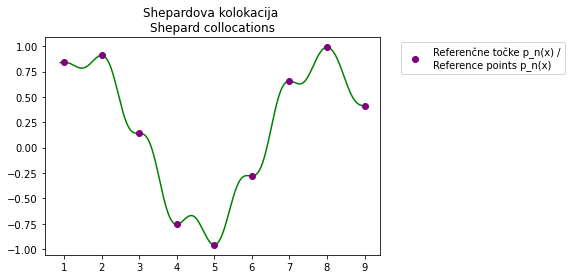

In [4]:
x_points = np.linspace(0.9,9,1000)

y_Shepard = np.array([])
for i in range(len(x_points)):
    y_Shepard = np.append(y_Shepard,Shepard(x_points[i],pn, fn))

g1, = plt.plot(x_points,y_Shepard,"-g",label = 'Shepardova kolokacija \nShepard collocation')
g2, = plt.plot(pn,fn[0], "o",color='purple', label = "Referenčne točke p_n(x) /\nReference points p_n(x)")
title = plt.title('Shepardova kolokacija \nShepard collocations')
legend = plt.legend(handles = [g2], bbox_to_anchor=(1.05, 1), loc='upper left')

<h2>Kolokacija s polinomskimi baznimi funkcijami  / <font color = "gray">Collocation with polynomial base functions</font> </h2>
<p1>
Naslednja kolokacijska shema je kolokacija s polinomskimi funkcijami. Tu je aproksimirana funkcija oblike
$f(\textbf{p}) = \psi (\textbf{p}) \cdot \textbf{c}$,kjer so $\psi_n$ funkcije polinomskega baznega vektorja. 

Če je število funkcij $\psi_n$ enako številu točk $\textbf {p}_n$, potem lahko koeficiente $\textbf{c}$ določimo z enačbo:

$\sum_{n=1}^{N} \psi_n (\textbf{p}_n) \cdot c_n = \textbf{f}_n$
</p1>

<p2><font color = "gray">
Next collocation scheme is collocation with polynomial functions. Here aproximated function is defined as $f(\textbf{p}) = \psi (\textbf{p}) \cdot \textbf{c}$, where $\psi_n$ are functions from polynomial base vector.

If the number of this functions matches the number of points $\textbf {p}_n$, then vector of coefficients $\textbf{c}$ can be determined through equation:

$\sum_{n=1}^{N} \psi_n (\textbf{p}_n) \cdot c_n = \textbf{f}_n$
</font></p2>

<h3>Implementacija kolokacije s polinomskimi baznimi funkcijami v kodi  / <font color = "gray">Implementation of collocation with polynomial base functions in code</font> </h3>

In [5]:
def colocation(p, fi):
    apr_fun = lambda x: np.asarray([1,x,x**2,x**3,x**4,x**5,x**6,x**7,x**8])
    fi = fi[0]
    i = 1
    A = apr_fun(p[0])
    b = fi
    while i < len(p):
        A = np.vstack((A,apr_fun(p[i])))
        i += 1
    c = np.linalg.solve(A,b)
    Cselect= np.append(c,np.zeros(11-len(c)))
    def fun(o):
        return Cselect[0] + Cselect[1]*o + \
        Cselect[2]*o**2 + Cselect[3]*o**3 + \
            Cselect[4]*o**4 + Cselect[5]*o**5 + \
                Cselect[6]*o**6 + Cselect[7]*o**7 + \
                    Cselect[8]*o**8 + Cselect[9]*o**9 + \
                        Cselect[10]*o**10
    return fun

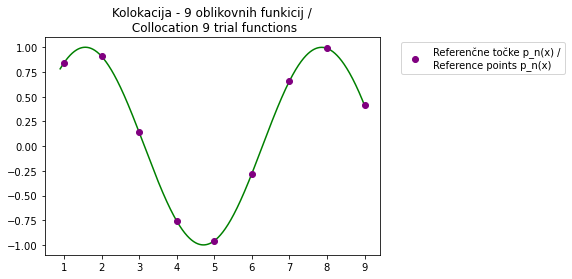

In [6]:
x_points = np.linspace(0.9,9,1000)
f1 = colocation(pn, fn)
fig = plt.figure(5)
g1, = plt.plot(x_points,f1(x_points),"-g",label = 'Kolokacija \n9 oblikovnih funkicij')
g2, = plt.plot(pn,fn[0], "o",color='purple', label = "Referenčne točke p_n(x) /\nReference points p_n(x)")
title = plt.title('Kolokacija - 9 oblikovnih funkicij /\n Collocation 9 trial functions')
legend = plt.legend(handles = [g2], bbox_to_anchor=(1.05, 1), loc='upper left')

<h2>Aproksimacija s klasično metodo najmanjših kvadratov  / <font color = "gray">Classic least squares approximation</font> </h2>
<p1>
Kadar nas zanimajo gradienti spremenjivke $f$ po domeni uporabimo aproksimacijo z metodo najmanjših kvadratov. Pri tej metodi je izbira števila funkcij v baznem vektorju $\psi$ poljubna. V splošnem velja, da z več funkcijami dobimo boljšo natančnost rešitve. Te funkcije so lahko polinomi ali katerekoli druge oblikovne funkcije. V tem prikazu smo zaradi enostavnosti izbrali polinomske oblikovne funkcije. Metoda najmanjših kvadratov je definirana z enačbo:

$\sum_{n=1}^{N} \underline{\psi}(\textbf{p}_n)\textbf{c}=
\sum_{n=1}^{N} \psi(\textbf{p}_n)f_n$;

$\psi_ij (\textbf{p}_n)=\psi_i(\textbf{p}_n)\psi_j(\textbf{p}_n)$
</p1>

<p2><font color = "gray">
When we are interested in gradients of variable $f$ through out the domain collocation is not adequate approach. In this case least squares approximation is used. Number of trial functions used in the method is arbitrary. In general, use of more trial functions leads to more precise sollution. Trial functions can be polynomials or any other trial functions. In demonstration, we have chosen polynomial trial functions for simplicity. The least squares method is defined by the equation:

$\sum_{n=1}^{N} \underline{\psi}(\textbf{p}_n)\textbf{c}=
\sum_{n=1}^{N} \psi(\textbf{p}_n)f_n$;

$\psi_ij (\textbf{p}_n)=\psi_i(\textbf{p}_n)\psi_j(\textbf{p}_n)$
    
</font></p2>


<h3>Implementacija klasične MPK v kodi  / <font color = "gray">Implementation of classic LSM in code</font> </h3>

In [7]:
def LSM(p,fi,order):
    """Pripravi aproksimacijsko funkcijo f reda order (do 10).
    Argumenti: matrika točk p, matrika rezultatov funkcije fi in red aproksimacijske funkcije order"""
    
    apr_fun = lambda x: np.asarray([ [1,x,x**2,x**3,x**4,x**5,x**6,x**7,x**8,x**9,x**10,x**11,x**12,x**13,x**14][:order+1] ])
    apr_fun = lambda x: np.asarray([[1,x,x**2,x**3,x**4,x**5,x**6,x**7,x**8,x**9,x**10,x**11,x**12,x**13,x**14][:order+1]])
    i = 0
    A = np.zeros((len(apr_fun(p)[0]),len(apr_fun(p)[0])))
    b = np.zeros(len(apr_fun(p)[0]))
    while i < len(p):
        Fi_p = apr_fun(p[i]) * apr_fun(p[i]).T
        Fi_f = apr_fun(p[i]) * fi[0,i]
        A += Fi_p
        b += Fi_f[0]
        i += 1
    c = np.linalg.solve(A,b)
    Cselect= np.append(c,np.zeros(15-len(c)))
    #display(np.allclose(np.dot(A, c), b))
    def fun(o):
        return Cselect[0] + Cselect[1]*o + \
        Cselect[2]*o**2 + Cselect[3]*o**3 + \
            Cselect[4]*o**4 + Cselect[5]*o**5 + \
                Cselect[6]*o**6 + Cselect[7]*o**7 + \
                    Cselect[8]*o**8 + Cselect[9]*o**9 + \
                        Cselect[10]*o**10+Cselect[11]*o**11+ \
                            Cselect[12]*o**12 + Cselect[13]*o**13 +\
                                Cselect[14]*o**14
    return fun

In [8]:
def plotting_LSM(fun, fn, pn, order1, order2):
    %matplotlib inline
    x_points = np.linspace(0.5,9,1000)
    f1 = LSM(pn, fn, order1)
    f2 = LSM(pn, fn, order2)
    fig = plt.figure(2)
    g1, = plt.plot(x_points,f1(x_points),"-g",label = f'{order1} trial functions')
    g2, = plt.plot(x_points,f2(x_points),"-b",label = f'{order2} trial functions')
    g3, = plt.plot(pn,fn[0], "o",color='purple', label = "referenčne točke p_n /\nreference points p_n")

    plt.legend(handles = [g1,g2,g3],
           title='Aproksimacija z MNK /\nAproximation with LSM',
           bbox_to_anchor=(1.05, 1), loc='upper left')
interact(plotting_LSM,
         fun = fixed(LSM),
         pn = fixed(pn),
         fn = fixed(fn),
         order1 = widgets.IntSlider(
             min=0,
             max=14,
             value=0,
             description="Število oblikovnih funkcij (prva krivulja) / Number of trial functions (first curve)"),
         order2 = widgets.IntSlider(
             min=0,
             max=14,
             value=1,
             description="Število oblikovnih funkcij (druga krivulja) / Number of trial functions (second curve)")
        )


interactive(children=(IntSlider(value=0, description='Število oblikovnih funkcij (prva krivulja) / Number of t…

<function __main__.plotting_LSM(fun, fn, pn, order1, order2)>

<h2>Aproksimacija z metodo uteženih najmanjših kvadratov  / <font color = "gray">Weighted least squares approximation</font> </h2>
<p1>
Kadar narava pojava veleva, da ima vrednost spremenljivke $f$ v določeni točki $\overline{\textbf p}$ še posebno velik vpliv na celotno fiziko, uporabimo metodo uteženih najmanjših kvadratov. Metoda je definirana z enačbo:

$\sum_{n=1}^{N} \theta (d_n) \underline{\psi}(\textbf{p}_n)\textbf{c}(\textbf{p})=
\sum_{n=1}^{N} \theta (d_n) \psi(\textbf{p}_n)f_n$; 

$\psi_ij (\textbf{p}_n)=\psi_i(\textbf{p}_n)\psi_j(\textbf{p}_n)$

vpliv vrednosti $f$ v $\overline{\textbf p}$ je ovrednosten z utežjo $\theta$, ki je v našem primeru definirana enačbo:

$\theta = e^\frac{-d^2}{4}$

in je odvisna zgolj od oddaljenosti $d = |\textbf{p}-\textbf {p}|$.
</p1>

<p2></p2>
    
<p3>
<font color = "gray">
When value of the variable $f$ in certain point $\overline{\textbf p}$ has strong impact on the physics of the phenomena, we use weighted least squares approximation. Method is defined by equation:

$\sum_{n=1}^{N} \theta (d_n) \underline{\psi}(\textbf{p}_n)\textbf{c}(\textbf{p})=
\sum_{n=1}^{N} \theta (d_n) \psi(\textbf{p}_n)f_n$; 

$\psi_ij (\textbf{p}_n)=\psi_i(\textbf{p}_n)\psi_j(\textbf{p}_n)$
    
impact of the value of $f$ in point $\overline{\textbf p}$ is evaluated by weight function $\theta$, that is defined by equation:

$\theta = e^\frac{-d^2}{4}$

and only depends on distance $d = |\textbf{p}-\textbf {p}|$.

</font></p3>
    
<h3>Implementacija utežene MPK v kodi  / <font color = "gray">Implementation of weighted LSM in code</font> </h3>

In [9]:
def w_LSM(p,fi, pW, order):
    """Pripraviaproksimacijsko funkcijo f reda order (do 10).
    Argumenti: vektor točk p, matrika rezultatov funkcije fi, položaj utežne točke pW
    in red aproksimacijske funkcije order"""
    
    apr_fun = lambda x: np.asarray([ [1,x,x**2,x**3,x**4,x**5,x**6,x**7,x**8,x**9,x**10][:order+1] ])
    i = 0
    A = np.zeros((len(apr_fun(p)[0]),len(apr_fun(p)[0])))
    b = np.zeros(len(apr_fun(p)[0]))
    while i < len(p):
        d = np.absolute(p[i]-pW)
        W = np.exp(-d**2/4) #Funkcija uteži
        Fi_p = apr_fun(p[i]) * apr_fun(p[i]).T
        Fi_f = apr_fun(p[i]) * fi[0,i]
        A += Fi_p * W
        b += Fi_f[0] * W
        i += 1
    c = np.linalg.solve(A,b)
    Cselect= np.append(c,np.zeros(11-len(c)))
    def fun(o):
        return Cselect[0] + Cselect[1]*o + \
        Cselect[2]*o**2 + Cselect[3]*o**3 + \
            Cselect[4]*o**4 + Cselect[5]*o**5 + \
                Cselect[6]*o**6 + Cselect[7]*o**7 + \
                    Cselect[8]*o**8 + Cselect[9]*o**9 + \
                        Cselect[10]*o**10
    return fun

In [10]:
def plotting_w_LSM(fun, fn, pn, weight_curve_1,weight_curve_2, order1, order2):
    %matplotlib inline
    w1 = weight_curve_1
    w2 = weight_curve_2
    x_points = np.linspace(0.5,9,1000)
    f1 = w_LSM(p=pn, fi=fn, pW=w1, order=order1)
    f2 = w_LSM(p=pn, fi=fn, pW=w2, order=order2)
    fig = plt.figure(2)
    g1, = plt.plot(x_points,f1(x_points),"-g",label = f'{order1} trial functions\nweight on point p = {w1}')
    g2, = plt.plot(x_points,f2(x_points),"-b",label = f'{order2} trial functions\nweight on point p = {w2}')
    g3, = plt.plot(pn,fn[0], "o",color='purple', label = "referenčne točke p_n /\nreference points p_n")

    plt.legend(handles = [g1,g2,g3],
           title='Aproksimacija z MNK /\nAproximation with LSM',
           bbox_to_anchor=(1.05, 1), loc='upper left')
    return
    
interact(plotting_w_LSM,\
         fun = fixed(w_LSM),\
         pn = fixed(pn),\
         fn = fixed(fn),\
         order1 = widgets.IntSlider(\
             min=0,\
             max=14,\
             value=2,\
             description="Število oblikovnih funkcij (prva krivulja) / Number of trial functions (first curve)"),\
         order2 = widgets.IntSlider(\
             min=0,\
             max=14,\
             value=3,\
             description="Število oblikovnih funkcij (druga krivulja) / Number of trial functions (second curve)"),\
         weight_curve_1 = pn,\
         weight_curve_2 = pn\
        )

interactive(children=(Dropdown(description='weight_curve_1', options=(1, 2, 3, 4, 5, 6, 7, 8, 9), value=1), Dr…

<function __main__.plotting_w_LSM(fun, fn, pn, weight_curve_1, weight_curve_2, order1, order2)>

<h2>Aproksimacija z metodo premičnih najmanjših kvadratov  / <font color = "gray">Moving least squares approximation</font> </h2>

Kadar potrebujemo zelo natančno aproksimacijo spremenljivke $f$ po domeni uporabimo premično metodo najmanjših kvadratov. V tem primeru rešujemo enačbo

$\sum_{n=1}^{N} \theta (d_n) \underline{\psi}(\textbf{p}_n)\textbf{c}(\overline{\textbf{p}})=
\sum_{n=1}^{N} \theta (d_n) \psi(\textbf{p}_n)f_n$;

$\psi_ij (\textbf{p}_n)=\psi_i(\textbf{p}_n)\psi_j(\textbf{p}_n)$

za vsako točko, kjer računamo vrednost $f$. Pri tem je utež $\theta$ definirana z razdaljo med točko z znano vrednostjo in točko v kateri rešujemo aproksimacijski problem $d = |\textbf{p}-\textbf {p}_n|$ preko utežne funkcije $\theta= e^\frac{-d^2}{4}$ (za ta prikaz).

<p1></p1>

<font color = "gray">
If we want the most precise approximation, moving least squares method is used. In this case we are solving equation
    

$\sum_{n=1}^{N} \theta (d_n) \underline{\psi}(\textbf{p}_n)\textbf{c}(\overline{\textbf{p}})=
\sum_{n=1}^{N} \theta (d_n) \psi(\textbf{p}_n)f_n$;

$\psi_ij (\textbf{p}_n)=\psi_i(\textbf{p}_n)\psi_j(\textbf{p}_n)$

for each point, where the value of $f$ is being approximated. Weight $\theta$ depends on distance  $d = |\textbf{p}-\textbf {p}_n|$ between the point with known value of $f$ and the point, where approximation is performed. In this demostration we used  kjer računamo vrednost $f$. In this demonstration weight function $\theta= e^\frac{-d^2}{4}$ is used.
</font>


<h3>Implementacija premične MPK v kodi  / <font color = "gray">Implementation of moving LSM in code</font> </h3>

In [11]:
def movingLSM(pn,fi, p,order):
    %matplotlib inline
    """Pripravi aproksimacijsko funkcije f v točki p reda order (do 10. reda)
    Argumenti: matrika znanih točk pn, matrika rezultatov funkcije fi, položaj  točke p[x], kjer vrednost iščemo in red aproksimacijske funkcije order. 
    Vrne aproksimirano vrednost aprox_value"""
    
    apr_fun = lambda x: np.asarray([ [1,x,x**2,x**3,x**4,x**5,x**6,x**7,x**8,x**9,x**10][:order+1] ])
    i = 0
    A = np.zeros((len(apr_fun(pn)[0]),len(apr_fun(pn)[0])))
    b = np.zeros(len(apr_fun(pn)[0]))
    while i < len(pn):
        d = pn[i]-p
        W = np.exp(-d**2/4) #Funkcija uteži
        Fi_pn = apr_fun(pn[i]) * apr_fun(pn[i]).T
        Fi_f = apr_fun(pn[i]) * fi[0,i]
        A += Fi_pn * W
        b += Fi_f[0] * W
        i += 1
    c = np.linalg.solve(A,b)
    Cselect= np.append(c,np.zeros(11-len(c)))
    aprox_value = Cselect[0] + Cselect[1]*p + \
        Cselect[2]*p**2 + Cselect[3]*p**3 + \
            Cselect[4]*p**4 + Cselect[5]*p**5 + \
                Cselect[6]*p**6 + Cselect[7]*p**7 + \
                    Cselect[8]*p**8 + Cselect[9]*p**9 + \
                        Cselect[10]*p**10
    return aprox_value

In [12]:
def plotting_m_LSM(fun, fn, pn, order1, order2):
    x_points = np.linspace(0.5,9,100)
    y1=[]
    y2=[]
    for i in x_points:
        y1.append(movingLSM(pn,fn, i, order1))
        y2.append(movingLSM(pn,fn, i, order2))
    y1 = np.array(y1)
    y2 = np.array(y2)
    fig = plt.figure(3)
    g1, = plt.plot(x_points,y1,"-g",label = f'{order1} trial functions')
    g2, = plt.plot(x_points,y2,"-b",label = f'{order2} trial functions')
    g3, = plt.plot(pn,fn[0], "o",color='purple', label = "referenčne točke p_n /\nreference points p_n")

    plt.legend(handles = [g1,g2,g3],
           title='Aproksimacija z premično MNK /\nAproximation with moving LSM',
           bbox_to_anchor=(1.05, 1), loc='upper left')

    
interact(plotting_m_LSM,
         fun = fixed(movingLSM),
         pn = fixed(pn),
         fn = fixed(fn),
         order1 = widgets.IntSlider(
             min=0,
             max=14,
             value=0,
             description="Število oblikovnih funkcij (prva krivulja) / Number of trial functions (first curve)"),
         order2 = widgets.IntSlider(
             min=0,
             max=14,
             value=1,
             description="Število oblikovnih funkcij (druga krivulja) / Number of trial functions (second curve)")
        )

interactive(children=(IntSlider(value=0, description='Število oblikovnih funkcij (prva krivulja) / Number of t…

<function __main__.plotting_m_LSM(fun, fn, pn, order1, order2)>

<h2>Prikaz aproksimacije z MNK v 2D  / <font color = "gray">Demonstration of approximation with LSM in 2D</font> </h2>

Aproksimiramo z 6 oblikovni funkcijami. / <font color = 'gray'> We approximate with 6 trial functions. </font>

$\psi=(1,x,y,x^2,x y, y^2)$

In [13]:
def apr_fun2D(p):
    """Aproksimacija kvadratne funkcije v 2D, argument 2D vektor polozaja p[x,y]"""
    return np.array([[1, p[0], p[1], p[0]**2, p[0]*p[1], p[1]**2]])

<h2>Polje točk z znanimi vrednostmi $f$  / <font color = "gray">Field of points with known values of$f$</font> </h2>

In [14]:
p = np.asarray([[1,1],[1,-1],[-1,1],[-1,-1],[0,0],[1,0],[-1,0],[0,1],[0,-1]])
fi1 = np.asarray([[1,-1,0,0,1,0,-1,-1,+1]]) 
fi2 = np.asarray([[+1,-0.5,1,1,-1,0,0,0,0]])

<h2>Implementacija klasične MNK v 2D / <font color = "gray"> Implementation of classic LSM in 2D</font> </h2>

In [15]:
def LSM_2D(apr_fun,p,fi):
    """Pripravi vektor koeficientov c aproksimacijske funkcije f z obliko apr_fun.
    Argumenti: matrika točk p, matrika rezultatov funkcije fi in oblika aproksimacijske funkcije apr_fun
    Kot ničti argument vrne matriko A, kot prvi vektor b """
    i = 0
    A = np.zeros((len(apr_fun(p[0])[0]),len(apr_fun(p[0])[0])))
    b = np.zeros(len(apr_fun(p[0])[0]))
    while i < len(p[:,0]):
        Fi_p = apr_fun(p[i]) * apr_fun(p[i]).T
        Fi_f = apr_fun(p[i]) * fi[0,i]
        A += Fi_p
        b += Fi_f[0]
        i += 1
    c = np.linalg.solve(A,b)
    return c

Izris rezultatov na 3D grafu / <font color = 'gray'>Ploting the results on 3D plot</font>

In [16]:
c = LSM_2D(apr_fun2D, p, fi1)
f = lambda x, y: c[0] + c[1]*x + c[2]*y + c[3]*x**2 + c[4]*x*y + c[5]*y**2
x_points = np.linspace(-1,1,num=100)
y_points = np.linspace(-1,1,num=100)
X,Y = np.meshgrid(x_points, y_points)
Z = f(X,Y)
x_ref = p[:,0]
y_ref = p[:,1]
f_ref = fi1[0]

<IPython.core.display.Javascript object>


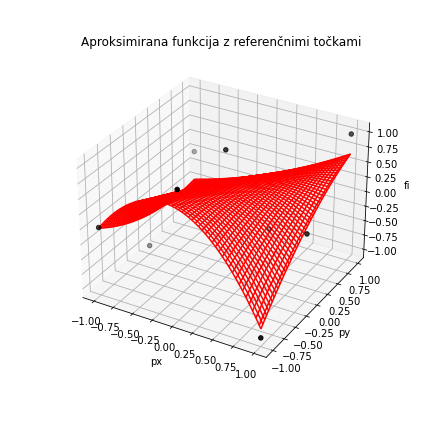

In [33]:
%matplotlib notebook
fig = plt.figure(1,figsize=(6,6))
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='red')
ax.set_title('Aproksimirana funkcija z referenčnimi točkami');
#Referencne točke
ax.scatter3D(x_ref, y_ref, f_ref,color="black");
ax.set_xlabel('px')
ax.set_ylabel('py')
ax.set_zlabel('fi');

Izris rezultatov na presečne ravnine / <font color = 'gray'>Ploting the results on section planes</font>

Text(0, 0.5, 'fi')

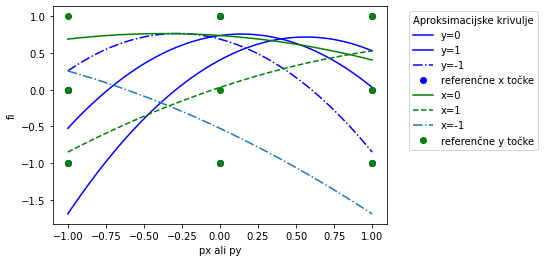

In [31]:
%matplotlib inline
fi = fi1[0]
fig2 = plt.figure(2)
g1, = plt.plot(x_points,f(x_points,0),"-b",label = "y=0")
g2, = plt.plot(x_points,f(x_points,1),"-b",label = "y=1")
g3, = plt.plot(x_points,f(x_points,-1),"-.b",label = "y=-1")
g4, = plt.plot(p[:,0],fi, "ob",label = "referenčne x točke")
g5, = plt.plot(y_points,f(0,y_points),"-g",label = "x=0")
g6, = plt.plot(y_points,f(1,y_points),"--g",label = "x=1")
g7, = plt.plot(y_points,f(-1,y_points),"-.",label = "x=-1")
g8, = plt.plot(p[:,1],fi,"og", label = "referenčne y točke")
plt.legend(handles=[g1,g2,g3,g4,g5,g6,g7,g8], title='Aproksimacijske krivulje', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('px ali py')
plt.ylabel('fi')

<h2>Implementacija utežene MNK v 2D / <font color = "gray"> Implementation of weighted LSM in 2D</font> </h2>

In [19]:
def w_LSM_2D(apr_fun,p,fi, pW):
    """Pripravi vektor koeficientov c aproksimacijske funkcije f z obliko apr_fun.
    Argumenti: oblika aproksimacijske funkcije apr_fun, matrika točk p, matrika rezultatov funkcije fi, in položaj utežne točke pW[xw,yw] 
    Kot ničti argument vrne matriko A, kot prvi vektor b """
    i = 0
    A = np.zeros((len(apr_fun(p[0])[0]),len(apr_fun(p[0])[0])))
    b = np.zeros(len(apr_fun(p[0])[0]))
    while i < len(p[:,0]):
        d = ((p[i,0]-pW[0])**2+(p[i,1]-pW[1])**2)**0.5
        W = np.exp(-d**2/4) #Funkcija uteži
        Fi_p = apr_fun(p[i]) * apr_fun(p[i]).T
        Fi_f = apr_fun(p[i]) * fi[0,i]
        A += Fi_p * W
        b += Fi_f[0] * W
        i += 1
    c = np.linalg.solve(A,b)
    return c

Utež postavimo na točko $(1,-1)$. / <font color = 'gray'>The weight is on point (1,-1)</font>

In [20]:
pW = np.asarray([1,-1])

Izris rezultatov na 3D grafu / <font color = 'gray'>Ploting the results on 3D plot</font>

In [21]:
#Risanje grafa
c = w_LSM_2D(apr_fun2D, p, fi1, pW)
f = lambda x, y: c[0] + c[1]*x + c[2]*y + c[3]*x**2 + c[4]*x*y + c[5]*y**2

x_points = np.linspace(-1,1,num=100)
y_points = np.linspace(-1,1,num=100)
X,Y = np.meshgrid(x_points, y_points)
Z = f(X,Y)

x_ref = p[:,0]
y_ref = p[:,1]
f_ref = fi1[0]

<IPython.core.display.Javascript object>


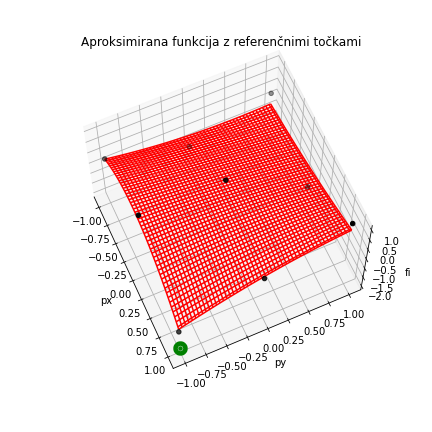

In [32]:
%matplotlib notebook
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='red')
ax.set_title('Aproksimirana funkcija z referenčnimi točkami');
#Referencne točke
ax.scatter3D(x_ref, y_ref, f_ref,color="black");
ax.scatter3D([pW[0]],[pW[1]],[-2], color="green", linewidth=10);

ax.set_xlabel('px')
ax.set_ylabel('py')
ax.set_zlabel('fi');
#ax.view_init(0, 0)

Izris rezultatov na presečne ravnine / <font color = 'gray'>Ploting the results on section planes</font>

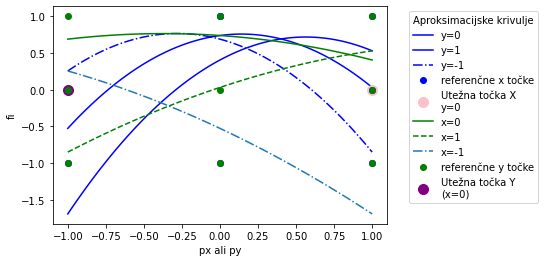

In [23]:
%matplotlib inline
fi = fi1[0]
fig2 = plt.figure()
g1, = plt.plot(x_points,f(x_points,0),"-b",label = "y=0")
g2, = plt.plot(x_points,f(x_points,1),"-b",label = "y=1")
g3, = plt.plot(x_points,f(x_points,-1),"-.b",label = "y=-1")
g10, = plt.plot(pW[0],[0],"o", label = "Utežna točka X\ny=0", markersize=10, color = 'pink')
g4, = plt.plot(p[:,0],fi, "ob",label = "referenčne x točke")
g5, = plt.plot(y_points,f(0,y_points),"-g",label = "x=0")
g6, = plt.plot(y_points,f(1,y_points),"--g",label = "x=1")
g7, = plt.plot(y_points,f(-1,y_points),"-.",label = "x=-1")
g9, = plt.plot(pW[1],[0],"o", label = "Utežna točka Y\n(x=0)", markersize=10, color = 'purple')
g8, = plt.plot(p[:,1],fi,"og", label = "referenčne y točke")
plt.xlabel('px ali py')
plt.ylabel('fi')
l=plt.legend(handles=[g1,g2,g3,g4,g10,g5,g6,g7,g8,g9], title='Aproksimacijske krivulje',
             bbox_to_anchor=(1.05, 1), loc='upper left')


<h2>Implementacija premične MNK v 2D / <font color = "gray">Implementation of moving LSM in 2D</font> </h2>

In [24]:
def movingLSM_2D(apr_fun,pn,fi, p):
    """Pripravi aproksimacijsoe funkcije f v točki p z obliko apr_fun.
    Argumenti: oblika aproksimacijske funkcije apr_fun, matrika znanih točk pn, matrika rezultatov funkcije pn fi, in položaj  točke p[x,y], kjer vrednost iščemo. 
    Vrne aproksimirano vrednost aprox_value"""
    i = 0
    A = np.zeros((len(apr_fun(pn[0])[0]),len(apr_fun(pn[0])[0])))
    b = np.zeros(len(apr_fun(pn[0])[0]))
    while i < len(pn[:,0]):
        d = ((pn[i,0]-p[0])**2+(pn[i,1]-p[1])**2)**0.5
        W = np.exp(-d**2/4) #Funkcija uteži
        Fi_pn = apr_fun(pn[i]) * apr_fun(pn[i]).T
        Fi_f = apr_fun(pn[i]) * fi[0,i]
        A += Fi_pn * W
        b += Fi_f[0] * W
        i += 1
    c = np.linalg.solve(A,b)
    aprox_value = c[0] + c[1]*p[0] + c[2]*p[1] + c[3]*p[0]**2 + c[4]*p[0]*p[1] + c[5]*p[1]**2
    return aprox_value

Izris rezultatov na 3D grafu / <font color = 'gray'>Ploting the results on 3D plot</font>

In [25]:
#Risanje grafa
min_border = -1
max_border = 1
num_points = 100
x_points = np.linspace(min_border,max_border,num=num_points)

X,Y = np.meshgrid(x_points, x_points)

Z = np.ones(np.shape(X))                                               
                                                   
for i in range(np.shape(X)[0]):
     for k in range(np.shape(X)[0]):
         Z[i,k] =  movingLSM_2D(apr_fun=apr_fun2D, pn = p, fi = fi1, p = np.asarray([X[i,k],Y[i,k]]))

x_ref = p[:,0]
y_ref = p[:,1]
f_ref = fi1[0]

<IPython.core.display.Javascript object>


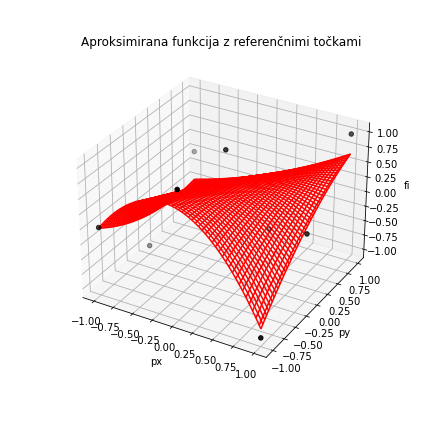

In [26]:
%matplotlib notebook
fig = plt.figure(50,figsize=(6,6))
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='red')
ax.set_title('Aproksimirana funkcija z referenčnimi točkami');
#Referencne točke
ax.scatter3D(x_ref, y_ref, f_ref,color="black");
#ax.scatter3D([pW[0]],[pW[1]],[-2], color="green", linewidth=10);

ax.set_xlabel('px')
ax.set_ylabel('py')
ax.set_zlabel('fi');